# Computational Social Science Project #2 

**Enter your Name:** Alex Schulte

*Semester:* Fall 2023


Below we fill in some of the code you might use to answer some of the questions. Here are some additional resources for when you get stuck:
* Code and documentation provided in the course notebooks  
* [Markdown cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) to help with formatting the Jupyter notebook
* Try Googling any errors you get and consult Stack Overflow, etc. Someone has probably had your question before!
* Send me a pull request on GitHub flagging the syntax that's tripping you up 

**INSTRUCTIONS:** For this project, copy all of the files in the Project 2 folder in the course repo into a "Project 2" subfolder within the "Computational Social Science Projects" directory that you created for the first project. You will work on the project locally, push your project to GitHub, and submit a link to the GitHub repo on bCourses by the project deadline. Be sure the final submission is in the main branch, which is what I'll pull down and re-run to grade. 

## 1. Introduction/Setup

#### a) Import relevant libraries
Here are some libraries you will need to get started. Along the way you may need to add more. Best practice is to add them here at the top of the script.

In [132]:
#
# import libraries you might need here 
#-----------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# use random seed for consistent results 
np.random.seed(273)

#### b) Read in and inspect data frame 
Read in the data frame and look at some of its attributes. Read in the data contained in the project folder: "Diabetes with Population Info by County 2017.csv".

In [133]:
#
# read in and inspect data frame
#-----------
# Note that "CountyFips" needs to be a string so the leading 0 isn't dropped (only if you want to make choropleth map) 
diabetes = pd.read_csv('Diabetes with Population Info by County 2017.csv', 
                       dtype={"CountyFIPS": str}) 

In [134]:
diabetes.head()

,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_1,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,race_total population_one race_american indian and alaska native_navajo tribal grouping,race_total population_one race_american indian and alaska native_sioux tribal grouping,race_total population_one race_asian,race_total population_one race_asian_asian indian,race_total population_one race_asian_chinese,race_total population_one race_asian_filipino,race_total population_one race_asian_japanese,race_total population_one race_asian_korean,race_total population_one race_asian_vietnamese,race_total population_one race_asian_other asian,race_total population_one race_native hawaiian and other pacific islander,race_total population_one race_native hawaiian and other pacific islander_native hawaiian,race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro,race_total population_one race_native hawaiian and other pacific islander_samoan,race_total population_one race_native hawaiian and other pacific islander_other pacific islander,race_total population_one race_some other race,race_total population_two or more races_1,race_total population_two or more races_white and black or african american,race_total population_two or more races_white and american indian and alaska native,race_total population_two or more races_white and asian,race_total population_two or more races_black or african american and american indian and alaska native,race alone or in combination with one or more other races_total population,race alone or in combination with one or more other races_total population_white,race alone or in combination with one or more other races_total population_black or african american,race alone or in combination with one or more other races_total population_american indian and alaska native,race alone or in combination with one or more other races_total population_asian,race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander,race alone or in combination with one or more other races_total population_some other race,hispanic or latino and race_total population,hispanic or latino and race_total population_hispanic or latino (of any race),hispanic or latino and race_total population_hispanic or latino (of any race)_mexican,hispanic or latino and race_total population_hispanic or latino (of any race)_puerto rican,hispanic or latino and race_total population_hispanic or latino (of any race)_cuban,hispanic or latino and race_total population_hispanic or latino (of any race)_other hispanic or latino,hispanic or latino and race_total population_not hispanic or latino,hispanic or latino and race_total population_not hispanic or latino_white alone,hispanic or latino and race_total population_not hispanic or latino_black or african american alone,hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone,hispanic or latino and race_total population_not hispanic or latino_asian alone,hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone,hispanic or latino and race_total population_not hispanic or latino_some other race alone,hispanic or latino and race_total population_not hispanic or latino_two or more races,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races including some o

In [135]:
#
# look at shape
#-----------
# look at the dimensions of the diabetes data frame
print('shape: ', diabetes.shape) 

shape:  (3220, 95)


In [136]:
#
# set pandas parameters
#-----------
# tells pandas how many rows to display when printing so results don't get truncated
pd.set_option('display.max_rows', 100)

# look at the data types for each column in diabetes df (likely be located under each row bc column names are long)
print('data types:', diabetes.dtypes)

data types: County                                                                                                                                                   object
State                                                                                                                                                    object
CountyFIPS                                                                                                                                               object
Diabetes_Number                                                                                                                                          object
Obesity_Number                                                                                                                                           object
Physical_Inactivity_Number                                                                                                                               object
sex and age_total population

Immediately, we see that some of the features that should be numeric (e.g., Diabetes_Number, Obesity_Number,  and Physical_Inactivity_Number) are not. We can check to see what the non-numeric values are in a column where we are expecting numeric information with a combination of `str.isnumeric()` and `unique()`.

In [137]:
#
# identify non-numeric features
#-----------
# Return rows where the column "Diabetes_Number" is non-numeric and get the unique values of these rows
# the "~" below in front of diabetes negates the str.isnumeric() so it only takes non-numeric values

print(diabetes[~diabetes["Diabetes_Number"].str.isnumeric()]["Diabetes_Number"].unique()) 

['Suppressed']


In [138]:
#
# Now do the same as above, but for "Obesity_Number"
#-----------
print(diabetes[~diabetes["Obesity_Number"].str.isnumeric()]["Obesity_Number"].unique()) 


['No Data']


In [139]:
#
# Now do the same as above, but for "Physical_Inactivity_Number" 
#-----------
print(diabetes[~diabetes["Physical_Inactivity_Number"].str.isnumeric()]["Physical_Inactivity_Number"].unique()) 


['No Data']


These values ("Suppresssed" and "No Data") contained in the two respective columns are coercing these features to objects instead of them being  integers. Let's drop those rows in the next section, and also recode "Physical_Inactivity_Number" feature to be an integer.

#### c. Recode variables

Convert 'Diabetes_Number', 'Obesity_Number', and 'Physical_Inactivity_Number' to integers below so we can use them in our analysis. Also fill in the object type we want to recode 'sex and age_total population_65 years and over_sex ratio (males per 100 females)' too (you'll have to scroll all the way over to the right).

In [140]:
#
# Recode variables
#-----------

# Diabetes
# ----------
# keep only useful info about our target feature, i.e., where diabetes_number not = 'Suppressed'
# note that the inside reference to the diabetes df identifies the column, and the outer calls specific rows according to a condition 
diabetes = diabetes[diabetes['Diabetes_Number']!="Suppressed"] 

# use the astype method on Diabetes_Number to convert it to an integer...if you are not sure, what does the astype() documentation tell you are possible arguments? 
diabetes['Diabetes_Number'] = diabetes['Diabetes_Number'].astype('int64') 

# Obesity
# ----------
diabetes = diabetes[diabetes['Obesity_Number']!='No Data'] 
diabetes['Obesity_Number'] = diabetes['Obesity_Number'].astype('int64') 

# Physical Inactivity
# ----------
diabetes = diabetes[diabetes['Physical_Inactivity_Number']!='No Data'] 
diabetes['Physical_Inactivity_Number'] = diabetes['Physical_Inactivity_Number'].astype('int64') 

# Some final changes 
# ----------
# 65+ sex ratio had one "-" in it so let's drop that row first
diabetes = diabetes[diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)']!= "-"]

# change to numeric from string, since it originally included the "-", which made it a string
# you'll have to decide whether to make it integer or float 
diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)'] = diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)'].astype(float)

In [141]:
diabetes.head()

,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_1,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,race_total population_one race_american indian and alaska native_navajo tribal grouping,race_total population_one race_american indian and alaska native_sioux tribal grouping,race_total population_one race_asian,race_total population_one race_asian_asian indian,race_total population_one race_asian_chinese,race_total population_one race_asian_filipino,race_total population_one race_asian_japanese,race_total population_one race_asian_korean,race_total population_one race_asian_vietnamese,race_total population_one race_asian_other asian,race_total population_one race_native hawaiian and other pacific islander,race_total population_one race_native hawaiian and other pacific islander_native hawaiian,race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro,race_total population_one race_native hawaiian and other pacific islander_samoan,race_total population_one race_native hawaiian and other pacific islander_other pacific islander,race_total population_one race_some other race,race_total population_two or more races_1,race_total population_two or more races_white and black or african american,race_total population_two or more races_white and american indian and alaska native,race_total population_two or more races_white and asian,race_total population_two or more races_black or african american and american indian and alaska native,race alone or in combination with one or more other races_total population,race alone or in combination with one or more other races_total population_white,race alone or in combination with one or more other races_total population_black or african american,race alone or in combination with one or more other races_total population_american indian and alaska native,race alone or in combination with one or more other races_total population_asian,race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander,race alone or in combination with one or more other races_total population_some other race,hispanic or latino and race_total population,hispanic or latino and race_total population_hispanic or latino (of any race),hispanic or latino and race_total population_hispanic or latino (of any race)_mexican,hispanic or latino and race_total population_hispanic or latino (of any race)_puerto rican,hispanic or latino and race_total population_hispanic or latino (of any race)_cuban,hispanic or latino and race_total population_hispanic or latino (of any race)_other hispanic or latino,hispanic or latino and race_total population_not hispanic or latino,hispanic or latino and race_total population_not hispanic or latino_white alone,hispanic or latino and race_total population_not hispanic or latino_black or african american alone,hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone,hispanic or latino and race_total population_not hispanic or latino_asian alone,hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone,hispanic or latino and race_total population_not hispanic or latino_some other race alone,hispanic or latino and race_total population_not hispanic or latino_two or more races,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races including some o

In [142]:
print('data types:', diabetes.dtypes)

data types: County                                                                                                                                                   object
State                                                                                                                                                    object
CountyFIPS                                                                                                                                               object
Diabetes_Number                                                                                                                                           int64
Obesity_Number                                                                                                                                            int64
Physical_Inactivity_Number                                                                                                                                int64
sex and age_total population

We should probably scale our count variables to be proportional to county population. We create the list 'rc_cols' to select all the features we want to rescale, and then use the `.div()` method to avoid typing out every single column we want to recode. 

In [143]:
#
# Scale to county populations
#-----------

# select count variables to recode to percentages; make sure we leave out ratios and our population variable 
# because these don't make sense to scale by population
rc_cols = [col for col in diabetes.columns if col not in ['County', 'State', 'CountyFIPS', 
                                                        'sex and age_total population_65 years and over_sex ratio (males per 100 females)', 
                                                        'sex and age_total population_sex ratio (males per 100 females)', 
                                                        'sex and age_total population_18 years and over_sex ratio (males per 100 females)',  
                                                        'race_total population']]
           
# recode all selected columns to numeric
diabetes[rc_cols] = diabetes[rc_cols].apply(pd.to_numeric, errors='coerce') 

# divide all columns but those listed above by total population to calculate rates
diabetes[rc_cols] = diabetes[rc_cols].div(diabetes['race_total population'], axis=0)

Let's check our work. Are all rates bounded by 0 and 1 as expected? 

_Yes, rates are now bounded by 0 and 1._

In [144]:
#
# check
#-----------
# set pandas options
pd.set_option('display.max_columns', None)

# inspect recoded values
diabetes_summary = diabetes.describe().transpose() # note we use the transpose method rather than .T because this object is not a numpy array
  
# check recoding 
with pd.option_context('display.max_rows', 100, 'display.max_columns', None): 
    display(diabetes_summary.iloc[ : ,[0,1,3,7]]) # select which columns in the summary table we want to present

,count,mean,min,max
Diabetes_Number,3112.0,0.092857,0.019038,2.242079e-01
Obesity_Number,3112.0,0.251666,0.088946,4.767883e-01
Physical_Inactivity_Number,3112.0,0.200861,0.064949,3.922853e-01
sex and age_total population_65 years and over_sex ratio (males per 100 females),3112.0,84.275643,34.700000,2.200000e+02
race_total population,3112.0,103682.624036,228.000000,1.009805e+07
race_total population_one race,3112.0,0.976059,0.713126,1.000000e+00
race_total population_two or more races,3112.0,0.023941,0.000000,2.868743e-01
race_total population_one race_1,3112.0,0.976059,0.713126,1.000000e+00
race_total population_one race_white,3112.0,0.831107,0.038912,1.000000e+00
race_total population_one race_black or african american,3112.0,0.090215,0.000000,8.741228e-01


#### d. Check for duplicate columns

There are a lot of columns in this data frame. Let's see if there are any are duplicates. Note that Pandas will not allow them to have the same exact column name, so they will likely be distinct on column name but will be copies otherwise.

In [145]:
#
# Check for duplicate columns
#-----------
# I used Google to figure this out, and adapted this example for our purposes:  
# source: https://thispointer.com/how-to-find-drop-duplicate-columns-in-a-dataframe-python-pandas/ 
def getDuplicateColumns(df):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)

duplicateColumnNames = list(getDuplicateColumns(diabetes))
print('Duplicate Columns are as follows: ')
duplicateColumnNames

Duplicate Columns are as follows: 


['sex and age_total population_18 years and over_1',
 'race_total population_one race_1',
 'sex and age_total population',
 'sex and age_total population_65 years and over_1',
 'race_total population_two or more races_1',
 'hispanic or latino and race_total population']

In [146]:
#
# drop columns from duplicates list
#-----------
# now drop list of duplicate features from our df using the .drop() method
diabetes = diabetes.drop(columns=['sex and age_total population_18 years and over_1',
                                  'race_total population_one race_1',
                                  'sex and age_total population',
                                  'sex and age_total population_65 years and over_1',
                                  'race_total population_two or more races_1',
                                  'hispanic or latino and race_total population']) 

In [147]:
# checking. duplicate values are now dropped

duplicateColumnNames = list(getDuplicateColumns(diabetes))
print('Duplicate Columns are as follows: ')
duplicateColumnNames

Duplicate Columns are as follows: 


[]

Finally, there are many states accounted for the in dataset. If we convert this column to a categorical variable, and create dummies, it will create a rather sparse matrix (many 0s in our dataset) becuase there will be 49 dummy variables. One alternative is to classify each state to a larger US region and use that variable instead of state. The following code will do that.

In [148]:
# Define a dictionary mapping states to regions
state_to_region = {
    'Alabama': 'Southeast',
    'Alaska': 'West',
    'Arizona': 'West',
    'Arkansas': 'South',
    'California': 'West',
    'Colorado': 'West',
    'Connecticut': 'Northeast',
    'Delaware': 'Northeast',
    'District of Columbia': 'Southeast',
    'Florida': 'Southeast',
    'Georgia': 'Southeast',
    'Hawaii': 'West',
    'Idaho': 'West',
    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Iowa': 'Midwest',
    'Kansas': 'Midwest',
    'Kentucky': 'South',
    'Louisiana': 'South',
    'Maine': 'Northeast',
    'Maryland': 'Northeast',
    'Massachusetts': 'Northeast',
    'Michigan': 'Midwest',
    'Minnesota': 'Midwest',
    'Mississippi': 'South',
    'Missouri': 'Midwest',
    'Montana': 'West',
    'Nebraska': 'Midwest',
    'Nevada': 'West',
    'New Hampshire': 'Northeast',
    'New Jersey': 'Northeast',
    'New Mexico': 'West',
    'New York': 'Northeast',
    'North Carolina': 'Southeast',
    'North Dakota': 'Midwest',
    'Ohio': 'Midwest',
    'Oklahoma': 'South',
    'Oregon': 'West',
    'Pennsylvania': 'Northeast',
    'Rhode Island': 'Northeast',
    'South Carolina': 'Southeast',
    'South Dakota': 'Midwest',
    'Tennessee': 'South',
    'Texas': 'South',
    'Utah': 'West',
    'Vermont': 'Northeast',
    'Virginia': 'Southeast',
    'Washington': 'West',
    'West Virginia': 'South',
    'Wisconsin': 'Midwest',
    'Wyoming': 'West'
}

# Add a new 'Region' column based on the mapping
diabetes['Region'] = diabetes['State'].map(state_to_region)

# Print to verify 'Region' column has been added
diabetes

# verified, Region added at the end

,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,race_total population_one race_american indian and alaska native_navajo tribal grouping,race_total population_one race_american indian and alaska native_sioux tribal grouping,race_total population_one race_asian,race_total population_one race_asian_asian indian,race_total population_one race_asian_chinese,race_total population_one race_asian_filipino,race_total population_one race_asian_japanese,race_total population_one race_asian_korean,race_total population_one race_asian_vietnamese,race_total population_one race_asian_other asian,race_total population_one race_native hawaiian and other pacific islander,race_total population_one race_native hawaiian and other pacific islander_native hawaiian,race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro,race_total population_one race_native hawaiian and other pacific islander_samoan,race_total population_one race_native hawaiian and other pacific islander_other pacific islander,race_total population_one race_some other race,race_total population_two or more races_white and black or african american,race_total population_two or more races_white and american indian and alaska native,race_total population_two or more races_white and asian,race_total population_two or more races_black or african american and american indian and alaska native,race alone or in combination with one or more other races_total population,race alone or in combination with one or more other races_total population_white,race alone or in combination with one or more other races_total population_black or african american,race alone or in combination with one or more other races_total population_american indian and alaska native,race alone or in combination with one or more other races_total population_asian,race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander,race alone or in combination with one or more other races_total population_some other race,hispanic or latino and race_total population_hispanic or latino (of any race),hispanic or latino and race_total population_hispanic or latino (of any race)_mexican,hispanic or latino and race_total population_hispanic or latino (of any race)_puerto rican,hispanic or latino and race_total population_hispanic or latino (of any race)_cuban,hispanic or latino and race_total population_hispanic or latino (of any race)_other hispanic or latino,hispanic or latino and race_total population_not hispanic or latino,hispanic or latino and race_total population_not hispanic or latino_white alone,hispanic or latino and race_total population_not hispanic or latino_black or african american alone,hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone,hispanic or latino and race_total population_not hispanic or latino_asian alone,hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone,hispanic or latino and race_total population_not hispanic or latino_some other race alone,hispanic or latino and race_total population_not hispanic or latino_two or more races,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races including some other race,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races excluding some

## 2. Exploratory Data Analysis

Make at least two figures (feel free to make more) and explain their relevance to the scientific problem. The goal here is to uncover interesting patterns in the data, learn more about the scope of the problem, and communicate these findings to your audience in clear ways.

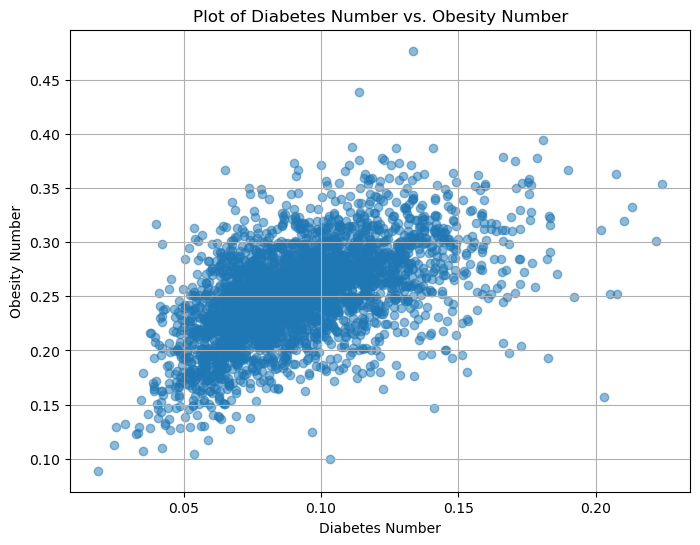

In [149]:
#
# EDA #1 and interpretations in this section 
#-----------
x = diabetes['Diabetes_Number']
y = diabetes['Obesity_Number']

# creating scatter plot
plt.figure(figsize=(8, 6))  # You can adjust the figure size as needed
plt.scatter(x, y, alpha=0.5)  # 'alpha' controls the transparency of points

# setting labels
plt.xlabel('Diabetes Number')
plt.ylabel('Obesity Number')
plt.title('Plot of Diabetes Number vs. Obesity Number')

# showing plot
plt.grid(True)  
plt.show()

#### Interpretation

It is plausible think there is a relationship between diabetes and obesity, so this plot explores that association. We can see that there seems to be a positive relationship, meaning those that have diabetes may also be obese (and vice versa).

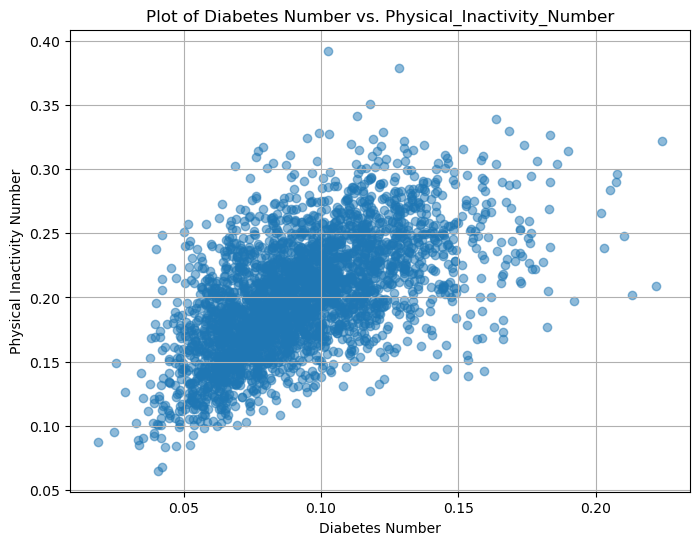

In [150]:
#
# EDA #2 and interpretations in this section 
#-----------
x = diabetes['Diabetes_Number']
y = diabetes['Physical_Inactivity_Number']

# creating scatter plot
plt.figure(figsize=(8, 6))  # You can adjust the figure size as needed
plt.scatter(x, y, alpha=0.5)  # 'alpha' controls the transparency of points

# setting labels
plt.xlabel('Diabetes Number')
plt.ylabel('Physical Inactivity Number')
plt.title('Plot of Diabetes Number vs. Physical_Inactivity_Number')

# showing plot
plt.grid(True)  
plt.show()

#### Interpretation

Similar to the previous graph, it is plausible think there is a relationship between physical inactivity and obesity, so this plot explores that association. We can see that there seems to be a positive relationship, meaning those that have diabetes may also not be doing that much physical activity.

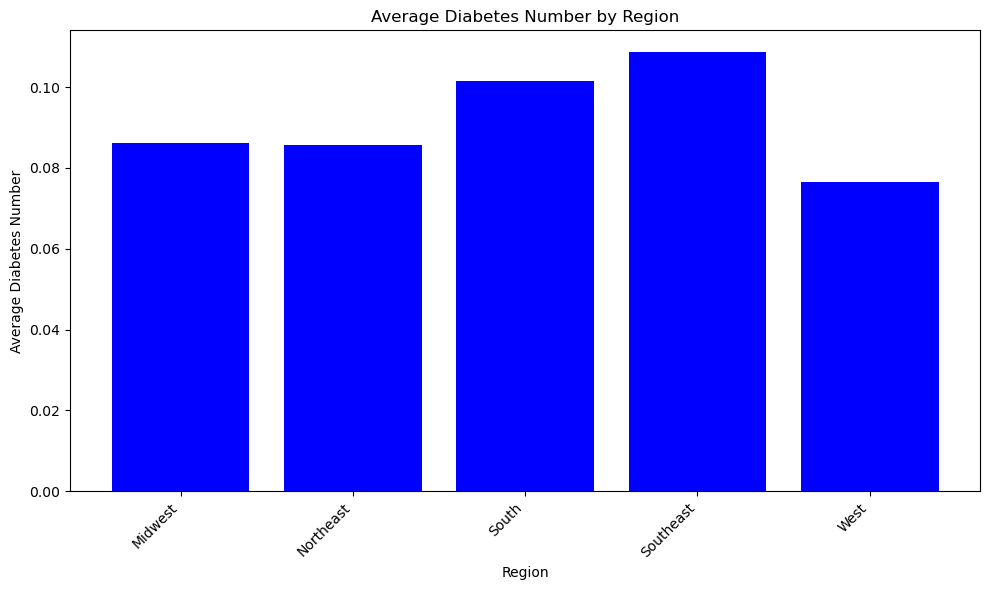

In [172]:
#
# EDA #3 and interpretations in this section 
#-----------

# calculating the average 'Diabetes_Number' per region
region_avg_diabetes = diabetes.groupby('Region')['Diabetes_Number'].mean().reset_index()

# making bar chart
plt.figure(figsize=(10, 6))  # You can adjust the figure size as needed
plt.bar(region_avg_diabetes['Region'], region_avg_diabetes['Diabetes_Number'], color='blue')

plt.xlabel('Region')
plt.ylabel('Average Diabetes Number')
plt.title('Average Diabetes Number by Region')

plt.xticks(rotation=45, ha='right')

# show
plt.tight_layout()  # Adjusts spacing to prevent label cutoff
plt.show()

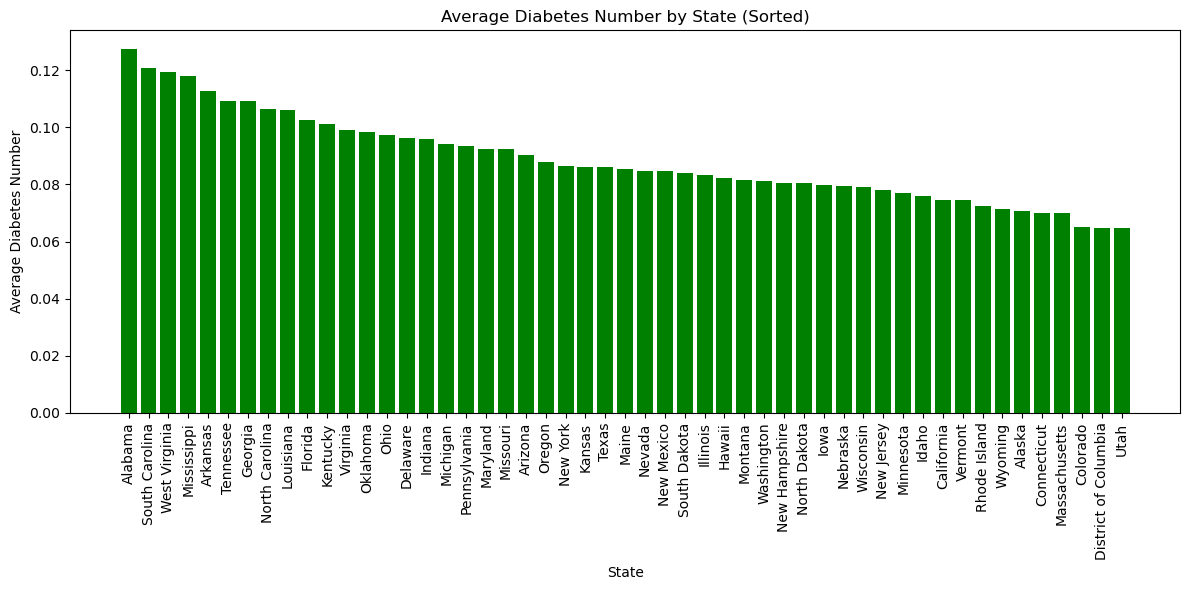

In [173]:
# Group data by 'State' and calculate the average 'Diabetes_Number'
state_avg_diabetes = diabetes.groupby('State')['Diabetes_Number'].mean().reset_index()

# Sort the states by average 'Diabetes_Number' in descending order
state_avg_diabetes_sorted = state_avg_diabetes.sort_values(by='Diabetes_Number', ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 6))  # You can adjust the figure size as needed
plt.bar(state_avg_diabetes_sorted['State'], state_avg_diabetes_sorted['Diabetes_Number'], color='green')

# Set axis labels and plot title
plt.xlabel('State')
plt.ylabel('Average Diabetes Number')
plt.title('Average Diabetes Number by State (Sorted)')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90, ha='center')

# Display the plot
plt.tight_layout()  # Adjusts spacing to prevent label cutoff
plt.show()

#### Interpretation

Different from the scatter plots above, these bar graphs show the average diabetes number per region and per state. We can see that the Southeast and South regions have the highest diabetes numbers and the states with the top 3 diabetes numbers are Alabama, South Carolina, and West Virginia. This information will be good to know as we think about which counties to target with the intervention.

## 3. Prepare to Fit Models

### 3.1 Finalize Data Set

We've already cleaned up the data, but we can make a few more adjustments before partitioning the data and training models. Let's recode 'Region' to be a categorical variable using `pd.get_dummies` and drop 'State'. Also, we'll drop 'County' because 'CountyFIPS' is already a unique identifier for the county. 

In [174]:
#
# Drop and get dummies
#-----------

# create dummy features out of 'Region', which might be related to diabetes rates 
diabetes_clean = pd.get_dummies(diabetes, 
                               columns = ['Region'],  
                               drop_first = True) # drop the first as a reference 

# drop 'County' and 'State' variables
diabetes_clean = diabetes_clean.drop(labels = ['County', 'State'],
                               axis = 1) # axis 1 tells python we want to drop columns rather than index rows

# look at first 10 rows of new data frame 
diabetes_clean.head(10) 

,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,race_total population_one race_american indian and alaska native_navajo tribal grouping,race_total population_one race_american indian and alaska native_sioux tribal grouping,race_total population_one race_asian,race_total population_one race_asian_asian indian,race_total population_one race_asian_chinese,race_total population_one race_asian_filipino,race_total population_one race_asian_japanese,race_total population_one race_asian_korean,race_total population_one race_asian_vietnamese,race_total population_one race_asian_other asian,race_total population_one race_native hawaiian and other pacific islander,race_total population_one race_native hawaiian and other pacific islander_native hawaiian,race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro,race_total population_one race_native hawaiian and other pacific islander_samoan,race_total population_one race_native hawaiian and other pacific islander_other pacific islander,race_total population_one race_some other race,race_total population_two or more races_white and black or african american,race_total population_two or more races_white and american indian and alaska native,race_total population_two or more races_white and asian,race_total population_two or more races_black or african american and american indian and alaska native,race alone or in combination with one or more other races_total population,race alone or in combination with one or more other races_total population_white,race alone or in combination with one or more other races_total population_black or african american,race alone or in combination with one or more other races_total population_american indian and alaska native,race alone or in combination with one or more other races_total population_asian,race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander,race alone or in combination with one or more other races_total population_some other race,hispanic or latino and race_total population_hispanic or latino (of any race),hispanic or latino and race_total population_hispanic or latino (of any race)_mexican,hispanic or latino and race_total population_hispanic or latino (of any race)_puerto rican,hispanic or latino and race_total population_hispanic or latino (of any race)_cuban,hispanic or latino and race_total population_hispanic or latino (of any race)_other hispanic or latino,hispanic or latino and race_total population_not hispanic or latino,hispanic or latino and race_total population_not hispanic or latino_white alone,hispanic or latino and race_total population_not hispanic or latino_black or african american alone,hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone,hispanic or latino and race_total population_not hispanic or latino_asian alone,hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone,hispanic or latino and race_total population_not hispanic or latino_some other race alone,hispanic or latino and race_total population_not hispanic or latino_two or more races,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races including some other race,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races excluding some other race -

### 3.2 Partition Data, Feature Selection, and Standardization

Now, we will partition our data to prepare it for the training process. Ultimately we want to use a 60% train—20% validation—20% test in this case. More data in the training set lowers bias, but then increases variance in the validation/test sets. Balancing between bias and variance with choice of these set sizes is important as we want to ensure that there is enough data to train on to get good predictions, but also want to make sure our hold-out sets are representative enough.

Work through partitioning the data into the test/train/validation sets in the chunks below. Be sure to that if you are using Ridge or LASSO, you Standardize the data. Where you do this in the workflow matters so be clear about where you are doing this and why. 

In [175]:
#
# Partition data
#-----------

# import library
from sklearn.model_selection import train_test_split

# create y dataframe 
y = diabetes_clean['Diabetes_Number']

# create X dataframe (include everything except "Diabetes_Number", our target, 
# and "race alone or in combination with one or more other races_total population")
X = diabetes_clean.drop(['Diabetes_Number', "race alone or in combination with one or more other races_total population"], 
                axis = 1) # refers to columns

In [176]:
y

0       0.093804
1       0.080281
2       0.131875
3       0.105251
4       0.108977
          ...   
3215    0.058028
3216    0.019038
3217    0.069872
3218    0.078361
3219    0.084648
Name: Diabetes_Number, Length: 3112, dtype: float64

In [177]:
X

,CountyFIPS,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,race_total population_one race_american indian and alaska native_navajo tribal grouping,race_total population_one race_american indian and alaska native_sioux tribal grouping,race_total population_one race_asian,race_total population_one race_asian_asian indian,race_total population_one race_asian_chinese,race_total population_one race_asian_filipino,race_total population_one race_asian_japanese,race_total population_one race_asian_korean,race_total population_one race_asian_vietnamese,race_total population_one race_asian_other asian,race_total population_one race_native hawaiian and other pacific islander,race_total population_one race_native hawaiian and other pacific islander_native hawaiian,race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro,race_total population_one race_native hawaiian and other pacific islander_samoan,race_total population_one race_native hawaiian and other pacific islander_other pacific islander,race_total population_one race_some other race,race_total population_two or more races_white and black or african american,race_total population_two or more races_white and american indian and alaska native,race_total population_two or more races_white and asian,race_total population_two or more races_black or african american and american indian and alaska native,race alone or in combination with one or more other races_total population_white,race alone or in combination with one or more other races_total population_black or african american,race alone or in combination with one or more other races_total population_american indian and alaska native,race alone or in combination with one or more other races_total population_asian,race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander,race alone or in combination with one or more other races_total population_some other race,hispanic or latino and race_total population_hispanic or latino (of any race),hispanic or latino and race_total population_hispanic or latino (of any race)_mexican,hispanic or latino and race_total population_hispanic or latino (of any race)_puerto rican,hispanic or latino and race_total population_hispanic or latino (of any race)_cuban,hispanic or latino and race_total population_hispanic or latino (of any race)_other hispanic or latino,hispanic or latino and race_total population_not hispanic or latino,hispanic or latino and race_total population_not hispanic or latino_white alone,hispanic or latino and race_total population_not hispanic or latino_black or african american alone,hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone,hispanic or latino and race_total population_not hispanic or latino_asian alone,hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone,hispanic or latino and race_total population_not hispanic or latino_some other race alone,hispanic or latino and race_total population_not hispanic or latino_two or more races,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races including some other race,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races excluding some other race - and three or more races,total housing units,citizen - voting age population_citizen - 18 a

Investigate whether there are any features that you should remove prior to spliting and model fitting. You may also consider using plots and relationships you found in the EDA stage for this question. Be sure to justify your logic. 

In [178]:
# it's best practice to remove variables that have a low correlation with the outcome variable for computational efficiency
# therefore, I'm calculating the correlation and will drop variables that have < 0.01 correlation
# based on the literature, dropping those with correlation lower than 0.01-0.03 seems best practice, so I will go on the conservative end with 0.01

data = pd.concat([X, y], axis=1)

# correlation coefficients
correlation_matrix = data.corr()

# correlation of features with the outcome y
target_correlation = correlation_matrix[y.name]

# sort
sorted_correlation = target_correlation.abs().sort_values(ascending=False)

print(sorted_correlation)

Diabetes_Number                                                                                                                                         1.000000
Physical_Inactivity_Number                                                                                                                              0.591118
Obesity_Number                                                                                                                                          0.549577
hispanic or latino and race_total population_not hispanic or latino_black or african american alone                                                     0.371810
race_total population_one race_black or african american                                                                                                0.369464
race alone or in combination with one or more other races_total population_black or african american                                                    0.365546
race_total population_two or more 

/var/folders/82/y3h5_5bj63g89f1zqt9sny1c0000gn/T/ipykernel_51428/3805096740.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


In [180]:
#
# Feature selection
#-----------

# droping variables that have < 0.1 correlation (see above for rationale)

X = diabetes_clean.drop(["race_total population_one race_asian_filipino",
                         "total housing units",
                         "sex and age_total population_10 to 14 years",
                         "sex and age_total population_female",
                         "sex and age_total population_male",
                         "hispanic or latino and race_total population_not hispanic or latino_white alone",
                         "sex and age_total population_35 to 44 years",
                         "Region_Northeast",
                         "race_total population_one race_asian_japanese",
                         "hispanic or latino and race_total population_not hispanic or latino_two or more races_two races including some other race",
                         "hispanic or latino and race_total population_hispanic or latino (of any race)_puerto rican",
                         "race_total population_one race_native hawaiian and other pacific islander_other pacific islander",
                         "race_total population_one race_native hawaiian and other pacific islander_samoan",
                         "race_total population_one race_native hawaiian and other pacific islander",
                         "race_total population_one race_american indian and alaska native_cherokee tribal grouping",
                         "hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone",
                         "sex and age_total population_sex ratio (males per 100 females)",
                         "race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander",
                         "race_total population_two or more races_black or african american and american indian and alaska native",
                         "sex and age_total population_18 years and over_sex ratio (males per 100 females)",
                         "hispanic or latino and race_total population_not hispanic or latino_two or more races",
                         "race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro",
                         "hispanic or latino and race_total population_not hispanic or latino_two or more races_two races excluding some other race -  and three or more races",
                         "hispanic or latino and race_total population_not hispanic or latino_some other race alone",
                         "hispanic or latino and race_total population_hispanic or latino (of any race)_cuban",
                         "sex and age_total population_median age (years)",
                         "sex and age_total population_18 years and over_male",
                         "race_total population_one race_native hawaiian and other pacific islander_native hawaiian",
                         "race_total population_one race_american indian and alaska native_sioux tribal grouping",
                         "race_total population_two or more races_white and black or african american",
                         "race_total population_one race_american indian and alaska native_navajo tribal grouping",
                         "hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone",
                         "race_total population_one race_american indian and alaska native",
                        "race_total population_one race_american indian and alaska native_chippewa tribal grouping",
                        "race alone or in combination with one or more other races_total population_american indian and alaska native",
                        "race_total population_two or more races_white and american indian and alaska native",
                        "sex and age_total population_85 years and over"], 
                        axis = 1) # refers to columns

In [181]:
# checking new X dataset
X

,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_asian,race_total population_one race_asian_asian indian,race_total population_one race_asian_chinese,race_total population_one race_asian_korean,race_total population_one race_asian_vietnamese,race_total population_one race_asian_other asian,race_total population_one race_some other race,race_total population_two or more races_white and asian,race alone or in combination with one or more other races_total population,race alone or in combination with one or more other races_total population_white,race alone or in combination with one or more other races_total population_black or african american,race alone or in combination with one or more other races_total population_asian,race alone or in combination with one or more other races_total population_some other race,hispanic or latino and race_total population_hispanic or latino (of any race),hispanic or latino and race_total population_hispanic or latino (of any race)_mexican,hispanic or latino and race_total population_hispanic or latino (of any race)_other hispanic or latino,hispanic or latino and race_total population_not hispanic or latino,hispanic or latino and race_total population_not hispanic or latino_black or african american alone,hispanic or latino and race_total population_not hispanic or latino_asian alone,citizen - voting age population_citizen - 18 and over population,citizen - voting age population_citizen - 18 and over population_male,citizen - voting age population_citizen - 18 and over population_female,sex and age_total population_under 5 years,sex and age_total population_5 to 9 years,sex and age_total population_15 to 19 years,sex and age_total population_20 to 24 years,sex and age_total population_25 to 34 years,sex and age_total population_45 to 54 years,sex and age_total population_55 to 59 years,sex and age_total population_60 to 64 years,sex and age_total population_65 to 74 years,sex and age_total population_75 to 84 years,sex and age_total population_under 18 years,sex and age_total population_16 years and over,sex and age_total population_18 years and over,sex and age_total population_21 years and over,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_female,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female,Region_South,Region_Southeast,Region_West
0,01001,0.093804,0.244366,0.226902,76.5,55200,0.981341,0.018659,0.768786,0.191395,0.010290,0.000000,0.001938,0.001594,0.003877,0.000217,0.007409,0.004656,1.0,0.785634,0.198587,0.016214,0.007736,0.027681,0.013351,0.005380,0.972319,0.189764,0.010290,0.748261,0.357736,0.390525,0.059112,0.072627,0.069837,0.060453,0.127971,0.142264,0.074837,0.048804,0.085344,0.045725,0.242192,0.785652,0.757808,0.717645,0.170344,0.145833,0.394511,0.063188,0.082645,0,1,0
1,01003,0.080281,0.233255,0.192324,86.6,208107,0.982836,0.017164,0.862662,0.094970,0.008073,0.000207,0.003176,0.000658,0.000615,0.000139,0.009774,0.004108,1.0,0.877861,0.097599,0.013570,0.012724,0.044943,0.024646,0.012013,0.955057,0.093841,0.008015,0.764957,0.366725,0.398233,0.055784,0.056168,0.061060,0.051848,0.112087,0.136132,0.069387,0.071362,0.117973,0.058456,0.219488,0.805893,0.780512,0.747221,0.239353,0.195404,0.405205,0.090675,0.104730,0,1,0
2,01005,0.131875,0.310643,0.210651,76.2,25782,0.986308,0.013692,0.473819,0.475758,0.003724,0.000427,0.000000,0.001862,0.000504,0.000737,0.030176,0.002094,1.0,0.483322,0.484524,0.006012,0.031029,0.042898,0.035102,0.004228,0.957102,0.473160,0.003297,0.775386,0.413001,0.362385,0.053914,0.056241,0.055620,0.064308,0

In [182]:
# checking datatypes
X.dtypes

CountyFIPS                                                                                                 object
Diabetes_Number                                                                                           float64
Obesity_Number                                                                                            float64
Physical_Inactivity_Number                                                                                float64
sex and age_total population_65 years and over_sex ratio (males per 100 females)                          float64
race_total population                                                                                       int64
race_total population_one race                                                                            float64
race_total population_two or more races                                                                   float64
race_total population_one race_white                                                    

In [183]:
#
# Training/test split
#-----------

# set the random seed
np.random.seed(10)


# split the data so that it returns 4 values: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X,                 # specify training dataset
                                                    y,                 # specify test dataset
                                                    train_size=0.80,      # specify proportional split for training
                                                    test_size=0.20)       # specify proportional split for test

In [184]:
#
# Validation split
#-----------

# train_test_split returns 4 values: X_train, X_test, y_train, y_test, so how do we create a 60-20-20 train-validate-test split? 
X_train, X_validate, y_train, y_validate = train_test_split(X_train,         # specify training x
                                                            y_train,         # specify training y
                                                            train_size=0.75, # set training proportional spilt
                                                            test_size=0.25)  # set testing proportional split 

In [185]:
#
# Standardization
#-----------
# Given that we want to only standardize non-dichotomous variables, we need to find a 
# solution that will loop over only the columns we want to standardize. The code below
# identifies all non-dichotomous variables in our dataset and only standardizes those.

# load library and create instance of Standard Scaler 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


# identify non-dichotomous columns we want to transform
columns = list(X_test.select_dtypes(include=['number']).loc[:, X_test.nunique() > 2])

# use loop to transform training data for only columns we want to transform
for column in columns:
    X_train[column] = scaler.fit_transform(X_train[column].values.reshape(-1, 1)).flatten()

# use loop to transform validation data for only columns we want to transform
for column in columns:
    X_validate[column] = scaler.fit_transform(X_validate[column].values.reshape(-1, 1)).flatten()

# use loop to transform test data for only columns we want to transform
for column in columns:
    X_test[column] = scaler.fit_transform(X_test[column].values.reshape(-1, 1)).flatten()

## 4. Train Models

In this section, train your models. 

**Note that if you use Lasso, you will likely need to specify a very high penalty (very low, like alpha of 0.001) because of convergence problems.**

### 4.1 Describe models

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem.

**MODEL DESCRIPTION(S):** 

**OLS**

Logic: Linear models. Works to minimize the sum of squared erros (SSE) between the predicted and actual outcomes values.

Assumptions:
- linearity
- no endogeneity
- homoscedasticity
- normal distribution of errors
- no autocorrelation
- no multicollinearity
see here for more information: https://365datascience.com/tutorials/statistics-tutorials/ols-assumptions/

Pros: simple to implement and easy to interpet the impact of each feature

Cons: can be sensitivty to outliers and may overfit the data (especially with many features and/or multicollinearity)

Why it could be a good fit for this problem: Because of feature selection above, all features should be relevant. Also using OLS would help with interpretability, which would be important for policy makers.

**Ridge**

Logic: Regularized linear regression that adds a penality to OLS loss function to keep coefficients from becomming too large

Assumptions: same as OLS

Pros: better when multicollinearity is present and reduces overfitting by constraining coefficients

Cons: less interpretable coefficients on the features

Why it could be a good fit for this problem: I think multicollinearity may be there, but I want to keep all the features given that we already dropped many in the feature selection above

**LASSO**

Logic: Similar to Ridge, but sets some coefficients exactly to zero, effectively doing feature selection

Assumptions: same as OLS

Pros: same as Ridge but can also do feature selection

Cons: if multicollinearity is present, LASSO may be worse than Ridge; may not always select the "best" features and could minimize too many depending on the alpha parameter

Why it could be a good fit for this problem: could help with feature selection given this is high dimensional data

### 4.2 Train models

Train each model in the training set, and be sure to tune hyperparameters if appropriate. Report any relevant summary statistics from the training set, including how well each model fits the training data.

In [186]:
# import relevant libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

#### Model 1:  OLS

In [190]:
#
# Model 1 training
#-----------

# Create a LinearRegression model
ols_model = LinearRegression()

# fit to training data
ols_model.fit(X_train, y_train)

# predictions
y_train_pred = ols_model.predict(X_train)

# summary statistics 
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("Mean Squared Error (MSE) on Training Data:", mse_train)
print("R-squared (R2) on Training Data:", r2_train)


Mean Squared Error (MSE) on Training Data: 2.3971058735510903e-26
R-squared (R2) on Training Data: 1.0


#### Model 2:  Ridge

In [191]:
#
# Model 2 training
#-----------

# Create a Ridge regression model with alpha=0.001
ridge_model = Ridge(alpha=0.001)

# fit to training data
ridge_model.fit(X_train, y_train)

# predictions
y_train_pred_ridge = ridge_model.predict(X_train)

# summary statistics
mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)

print("Ridge Model - Mean Squared Error (MSE) on Training Data:", mse_train_ridge)
print("Ridge Model - R-squared (R2) on Training Data:", r2_train_ridge)


Ridge Model - Mean Squared Error (MSE) on Training Data: 5.143021780548567e-16
Ridge Model - R-squared (R2) on Training Data: 0.9999999999993839


#### Model 3:  LASSO

In [192]:
#
# Model 3 training
#-----------

# Create a Lasso regression model with alpha=0.001
lasso_model = Lasso(alpha=0.001)

# fit to the training data
lasso_model.fit(X_train, y_train)

# predictions
y_train_pred_lasso = lasso_model.predict(X_train)

# summary statistics
mse_train_lasso = mean_squared_error(y_train, y_train_pred_lasso)
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)

print("Lasso Model - Mean Squared Error (MSE) on Training Data:", mse_train_lasso)
print("Lasso Model - R-squared (R2) on Training Data:", r2_train_lasso)

Lasso Model - Mean Squared Error (MSE) on Training Data: 1.0012581915617924e-06
Lasso Model - R-squared (R2) on Training Data: 0.9988006400465619


## 5. Validate and Refine Models

### 5.1 Predict on the validation set
Using each of the models you trained, predict outcomes in the validation set. Evaluate how well each model did.

In [193]:
#
# Predict on validation data
#-----------

# Predict outcomes in the validation set for OLS, Ridge, and LASSO
y_validate_pred_ols = ols_model.predict(X_validate)
y_validate_pred_ridge = ridge_model.predict(X_validate)
y_validate_pred_lasso = lasso_model.predict(X_validate)

# MSE evaluation
mse_ols = mean_squared_error(y_validate, y_validate_pred_ols)
mse_ridge = mean_squared_error(y_validate, y_validate_pred_ridge)
mse_lasso = mean_squared_error(y_validate, y_validate_pred_lasso)

print("MSE for OLS:", mse_ols)
print("MSE for Ridge:", mse_ridge)
print("MSE for LASSO:", mse_lasso)

# R-squared evaluation
r2_ols = r2_score(y_validate, y_validate_pred_ols)
r2_ridge = r2_score(y_validate, y_validate_pred_ridge)
r2_lasso = r2_score(y_validate, y_validate_pred_lasso)

print("R2 for OLS:", r2_ols)
print("R2 for Ridge:", r2_ridge)
print("R2 for LASSO:", r2_lasso)

MSE for OLS: 1.2399512827930721e-05
MSE for Ridge: 1.2399412249233485e-05
MSE for LASSO: 7.677915654305997e-06
R2 for OLS: 0.9816938081753128
R2 for Ridge: 0.98169395666606
R2 for LASSO: 0.9886646033007935


**Result**

LASSO had the lowest MSE and highest R2 so it seems like that would be the best choice. However, when I looked more closely at the coefficients (below), many of them were 0 which likely has to do with the feature selection process above (and possibly the alpha parameter 0.001)

Therefore, I'm going to use Ridge because it is good to deal with multicollinearity but does not involve new feature selection.

In [194]:
lasso_coefficients = lasso_model.coef_
lasso_coefficients

array([-2.32126846e-09,  2.78921142e-02,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

### 5.2 Predict on the test set

Now, choose your best performing model of the three, select out unimportant feature(s), retrain the model, and then predict on the test set. 

In [195]:
# Predict outcomes 
y_test_pred_ridge = ridge_model.predict(X_test)

# summary statistics
mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)

print("MSE on Test Data (Ridge model):", mse_test_ridge)
print("R2 on Test Data (Ridge model):", r2_test_ridge)

MSE on Test Data (Ridge model): 5.622972325728761e-06
R2 on Test Data (Ridge model): 0.992597562606254


### 5.3 Impement a cross-validation approach

Finally, implement a cross-validation approach for your best model and evaluate the results.

In [196]:
#
# Run cross-validation
#-----------

from sklearn.model_selection import cross_val_score

# k-fold cross-validation 
k = 5
cross_val_scores = cross_val_score(ridge_model, X_train, y_train, cv=k, scoring='neg_mean_squared_error')

# need to convert the negative MSE scores to positive values
mse_scores = -cross_val_scores

# because of cross validation, we need to calculate mean and standard deviation of MSE scores to evaluate the results
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

print("Mean MSE:", mean_mse)
print("Standard Deviation of MSE:", std_mse)

Mean MSE: 8.822015496714928e-16
Standard Deviation of MSE: 1.0049602159019721e-16


## 6. Discussion Questions

In this section, insert responses for discussion questions here.

1. What is bias-variance tradeoff? Why is it relevant to machine learning problems like this one?

As we discussed in class, the error in a machine learning model comes from two sources:
- Bias: Error arising from the difference between the predicted and true outcome. High bias models tend to underfit.
- Variance: Error arising from modeling the noise in the outcome. High variance models tend to overfit.

The less bias in a model, the higher the variance and vice versa. Underfitting or overfitting makes generalizing to new data hard. Models will tend to perform better on the data that they are trained on, as compared to out of sample data.


2. Define overfitting, and why it matters for machine learning. How can we address it?

Overfitting is when a model "learns" the training data too well - it captures the real patterns (signal) but also the random fluctuations (noise). As mentioned above, this would lead to a model that performs very well in the training data but doesn't generalize. 

Overfitting can be addressed by: 
- simplifying the model (fewer parameters, less complexity)
- regularization, including tuning the alpha parameters to balance complexity and performance
- dropping features that are irrelevant or noise; only keep the ones that have the strongest correlation with the outcome

3. Discuss your analysis in 2-3 paragraphs. Discuss your findings and recommendations. Which counties or regions would you prioritize for the pilot program? Would your answers change based on whether you want to take into account certain features such as race, gender, or age composition in the county? How confident would you be deploying this sort of model in a real-world application – why or why not?

This project aims to predict diabetes rates in U.S. counties using machine learning models. We explored the dataset, built several models (OLS, Ridge, LASSO), evaluated their performance, and selected the model that best fit the data and relevant problem (Ridge). I would initially priortize the pilot program for counties in the South and Southeast, particularly Alabama, South Carolina, and West Virginia, given these areas have the highest diabetes numbers. By targeting counties with the highest predicted diabetes rates, the pilot program can focus resources where they will likely have the biggest impact. 

My answers may change if we take features such as race, gender, or age into account, although the correlation analysis showed that several of these variables were not correlated with the outcomes. For example, the "sex and age_total population_median age (years)" variable only had a correlation value of 0.043229. Additionally, many of the tribal grouping variables had low correlation. It is also important to note that correlations do not imply causation. While the model can identify associations between certain features and diabetes rates, it does not prove causal relationships.

I am not very confident in deploying this model in a real-world application because I feel like there are other, more complex methods (that we may learn later in the semester) that would give more accurate and nuanced predictions. For example, I'm not sure if I did the appropriate procedure for the feature selection at the beginning and obviously got strange results with the lasso feature selection process, so I'd like to better understand how to choose the best / most important features to include in the prediction model. However, if we did deploy the model in a real-world setting, it would be crucial to ensure  continuous monitoring and evaluation to assess its effectiveness and adapt interventions as needed.